In [1]:
#This project is belong to group 2 : CSCE 5380 
#The code were contributed by Syed Araib Karim, Hamza Tahir ,and Phongsiri Nirachornkul

# data processing tools
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from math import sqrt
import itertools
from collections import Counter
import plotly.express as px
import matplotlib.axes as ax

# model tools
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import neighbors
import xgboost as xgb

# NLP tools
import spacy
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Visualization tools
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
 


In [2]:
data = pd.read_csv(r"Datasets\austinHousingData.csv")
df = data.copy()

# EDA

## Data Prep : Cleaning

### Checking for Data types, null values, missing values and unique values

In [3]:
print("Rows     : ", data.shape[0])
print("Columns  : ", data.shape[1])
print("\nFeatures : \n", data.columns.tolist())
print("\nMissing values :  ", data.isnull().sum().values.sum())
print("\nUnique values :  \n", data.nunique())


Rows     :  15171
Columns  :  47

Features : 
 ['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude', 'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView', 'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice', 'numPriceChanges', 'latest_saledate', 'latest_salemonth', 'latest_saleyear', 'latestPriceSource', 'numOfPhotos', 'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures', 'numOfWaterfrontFeatures', 'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'homeImage']

Missing values :   0

Unique values :  
 zpid                          15171
city                        

In [4]:
data.dtypes

zpid                            int64
city                           object
streetAddress                  object
zipcode                         int64
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

In [5]:
data.isnull().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [6]:
data.head()

zpid          city          streetAddress  zipcode  \
0   111373431  pflugerville   14424 Lake Victor Dr    78660   
1   120900430  pflugerville     1104 Strickling Dr    78660   
2  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
3   120901374  pflugerville     1025 Strickling Dr    78660   
4    60134862  pflugerville  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  hasCooling  hasGarage  \
0             1.98             2            True        True       True   
1             1.98             2            True        True       True   
2             1.98             0            True        True      False   
3             1.98             2            True        True       True   
4             1.98             0            True        True      False   

   hasHeating  hasSpa  hasView       homeType  parkingSpaces  yearBuilt  \
0        True   False    False  Single Family              2       2012   
1        True   False    False  Single Family              2       2013   
2        True   False    False  Single Family              0       2018   
3        True   False    False  Single Family              2       2013   
4        True   False    False  Single Family              0       2002   

   latestPrice  numPriceChanges latest_saledate  latest_salemonth  \
0     305000.0                5      2019-09-02                 9   
1     295000.0                1      2020-10-13                10   
2     256125.0                1      2019-07-31                 7   
3     240000.0                4      2018-08-08                 8   
4     239900.0                3      2018-10-31                10   

   latest_saleyear                                latestPriceSource  \
0             2019  Coldwell Banker United, Realtors - South Austin   
1             2020                                   Agent Provided   
2             2019                                   Agent Provided   
3             2018                                   Agent Provided   
4             2018                                   Agent Provided   

   numOfPhotos  numOfAccessibilityFeatures  numOfAppliances  \
0           39                           0                5   
1           29                           0                1   
2            2                           0                4   
3            9                           0                0   
4           27                           0                0   

   numOfParkingFeatures  numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
0                     2                           1                      3   
1                     2                           0                      0   
2                     1                           0                      1   
3                     2                           0                      0   
4                     1                           0                      0   

   numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
0                        0                    1                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  numOfElementarySchools  \
0       6011.0          2601.0         

### Remove any houses with zero bedrooms or bathrooms

In [7]:
print(len(df))

15171


In [8]:
#remove any house with zero Bedroom 
df = df[df.numOfBedrooms != 0]

#remove any house with zero Bathroom
df = df[df.numOfBathrooms != 0]

print(len(df))

#Remove 137 with zero bedrooms and bathrooms

15034


### Remove any houses with the pricetag below $100,000

There are mixed between house for rent and house for sell in this datasets.
we can see from this below table that there are a lot of houses that cost only $5,000 - $10,000 which doesn't count as homes for sell. We need to eliminate those houses from our datasets.

In [9]:
price_Bed = df[['numOfBedrooms', 'numOfBathrooms', 'latestPrice', 'lotSizeSqFt', 'livingAreaSqFt']]
price_sorted = price_Bed.sort_values('latestPrice', ascending=True).head(20)

print(price_sorted)

       numOfBedrooms  numOfBathrooms  latestPrice  lotSizeSqFt  livingAreaSqFt
844                5             5.0       5500.0       9060.0          4094.0
5796               5             4.0       5600.0      14374.8          6000.0
785                5             6.0       5800.0      16117.2          4979.0
9310               4             3.0       6000.0       6734.0          2330.0
13184              6             4.0       6300.0      10005.0          2693.0
14335              3             4.0       6800.0      10149.0          3321.0
9272               3             3.0       7500.0       6882.0          2706.0
14580              4             4.5       7900.0      10454.0          4064.0
9869               3             2.0       8000.0       4713.0          1623.0
4823               6             5.0       8000.0      92347.2          5526.0
15090              3             1.0      21500.0      12196.8          1312.0
14780              3             1.0      23000.0   

In [10]:
df = df[df.latestPrice >= 100000]

print(len(df))
#Removed 29 houses

14976


## Checking the home type

In [11]:
df['homeType'].value_counts(normalize=True)

Single Family            0.945713
Condo                    0.030849
Townhouse                0.011485
Multiple Occupancy       0.005809
Residential              0.002471
Apartment                0.001269
Mobile / Manufactured    0.001068
MultiFamily              0.000668
Vacant Land              0.000467
Other                    0.000200
Name: homeType, dtype: float64

## Checking Target Value's distribution

In [12]:
data['latestPrice'].describe()

count    1.517100e+04
mean     5.127677e+05
std      4.531853e+05
min      5.500000e+03
25%      3.090000e+05
50%      4.050000e+05
75%      5.750000e+05
max      1.350000e+07
Name: latestPrice, dtype: float64

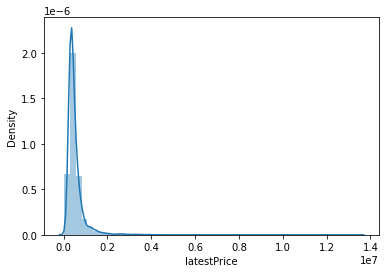

In [13]:
#Deviate from the normal distribution.
#Have appreciable positive skewness.
#Shows shape peakedness.
sns.distplot(data['latestPrice']);

In [14]:
#skewness and kurtosis
print("Skewness: %f" % data['latestPrice'].skew())
print("Kurtosis: %f" % data['latestPrice'].kurt())

#the skewness in here is 8.846 which became an extremely positive skewness, more than 1.0
#the kurtosis in here is 165.31 which is greater than 3. We considered it as Leptokurtic(long and small tail)

Skewness: 8.845543
Kurtosis: 165.318946


In [15]:
data.head()

zpid          city          streetAddress  zipcode  \
0   111373431  pflugerville   14424 Lake Victor Dr    78660   
1   120900430  pflugerville     1104 Strickling Dr    78660   
2  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
3   120901374  pflugerville     1025 Strickling Dr    78660   
4    60134862  pflugerville  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  hasCooling  hasGarage  \
0             1.98             2            True        True       True   
1             1.98             2            True        True       True   
2             1.98             0            True        True      False   
3             1.98             2            True        True       True   
4             1.98             0            True        True      False   

   hasHeating  hasSpa  hasView       homeType  parkingSpaces  yearBuilt  \
0        True   False    False  Single Family              2       2012   
1        True   False    False  Single Family              2       2013   
2        True   False    False  Single Family              0       2018   
3        True   False    False  Single Family              2       2013   
4        True   False    False  Single Family              0       2002   

   latestPrice  numPriceChanges latest_saledate  latest_salemonth  \
0     305000.0                5      2019-09-02                 9   
1     295000.0                1      2020-10-13                10   
2     256125.0                1      2019-07-31                 7   
3     240000.0                4      2018-08-08                 8   
4     239900.0                3      2018-10-31                10   

   latest_saleyear                                latestPriceSource  \
0             2019  Coldwell Banker United, Realtors - South Austin   
1             2020                                   Agent Provided   
2             2019                                   Agent Provided   
3             2018                                   Agent Provided   
4             2018                                   Agent Provided   

   numOfPhotos  numOfAccessibilityFeatures  numOfAppliances  \
0           39                           0                5   
1           29                           0                1   
2            2                           0                4   
3            9                           0                0   
4           27                           0                0   

   numOfParkingFeatures  numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
0                     2                           1                      3   
1                     2                           0                      0   
2                     1                           0                      1   
3                     2                           0                      0   
4                     1                           0                      0   

   numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
0                        0                    1                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  numOfElementarySchools  \
0       6011.0          2601.0         

## checking if YearBuilt plays a role; slightly does

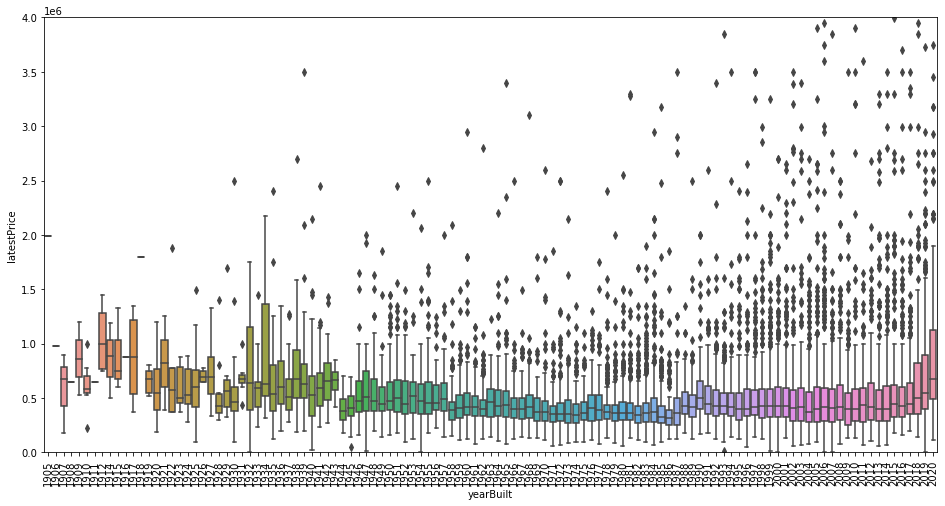

In [16]:
var = 'yearBuilt'
data1 = pd.concat([data['latestPrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="latestPrice", data=data1)
fig.axis(ymin=0, ymax=4000000);
plt.xticks(rotation=90);

In [17]:
df

zpid          city                   streetAddress  zipcode  \
0       111373431  pflugerville            14424 Lake Victor Dr    78660   
1       120900430  pflugerville              1104 Strickling Dr    78660   
2      2084491383  pflugerville             1408 Fort Dessau Rd    78660   
3       120901374  pflugerville              1025 Strickling Dr    78660   
4        60134862  pflugerville           15005 Donna Jane Loop    78660   
...           ...           ...                             ...      ...   
15166    29512934        austin                 905 Silcantu Dr    78748   
15167   241937773        austin  1413 Waterloo Shore Ln UNIT 12    78741   
15168    29473281        austin                   2206 S 3rd St    78704   
15169    29392029        austin               2000 Chestnut Ave    78722   
15170    29390174        austin                  3110 E 12th St    78702   

                                             description   latitude  \
0      14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632   
1      Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673   
2      Under construction - estimated completion in A...  30.409748   
3      Absolutely darling one story home in charming ...  30.432112   
4      Brimming with appeal & warm livability! Sleek ...  30.437368   
...                                                  ...        ...   
15166  Not for rent!\n\nBeautiful one story home in T...  30.161997   
15167  This contemporary three-story detached condo h...  30.240223   
15168  Original bungalow with a modern addition. Larg...  30.244835   
15169  So many options at this address in the eclecti...  30.281569   
15170  3110 E 12th St, Austin, TX 78702 is a single f...  30.276930   

       longitude  propertyTaxRate  garageSpaces  hasAssociation  hasCooling  \
0     -97.663078             1.98             2            True        True   
1     -97.661697             1.98             2            True        True   
2     -97.639771             1.98             0            True        True   
3     -97.661659             1.98             2            True        True   
4     -97.656860             1.98             0            True        True   
...          ...              ...           ...             ...         ...   
15166 -97.816345             1.98             6           False        True   
15167 -97.772835             1.98             2            True        True   
15168 -97.761124             1.98             2           False        True   
15169 -97.717789             1.98             0           False        True   
15170 -97.701523             1.98             1           False        True   

       hasGarage  hasHeating  hasSpa  hasView       homeType  parkingSpaces  \
0           True        True   False    False  Single Family              2   
1           True        True   False    False  Single Family              2   
2          False        True   False    False  Single Family              0   
3           True        True   False    False  Single Family              2   
4          False        True   False    False  Single Family              0   
...          ...         ...     ...      ...            ...            ...   
15166       True        True   False     True  Single Family              6   
15167       True        True    True     True  Single Family              2   
15168       True        True   False    False  Single Family              2   
15169      False        True   False    False    MultiFamily              0   
15170       True        True   False     True  Single Family              1   

       yearBuilt  latestPrice  numPriceChanges latest_saledate  \
0           2012     305000.0                5      2019-09-02   
1           2013     295000.0                1      2020-10-13   
2           2018     256125.0                1      2019-07-31   
3           2013     240000.0                4      2018-08-08   
4           2002   

## logically 'livingAreaSqFt' should affect the price more.

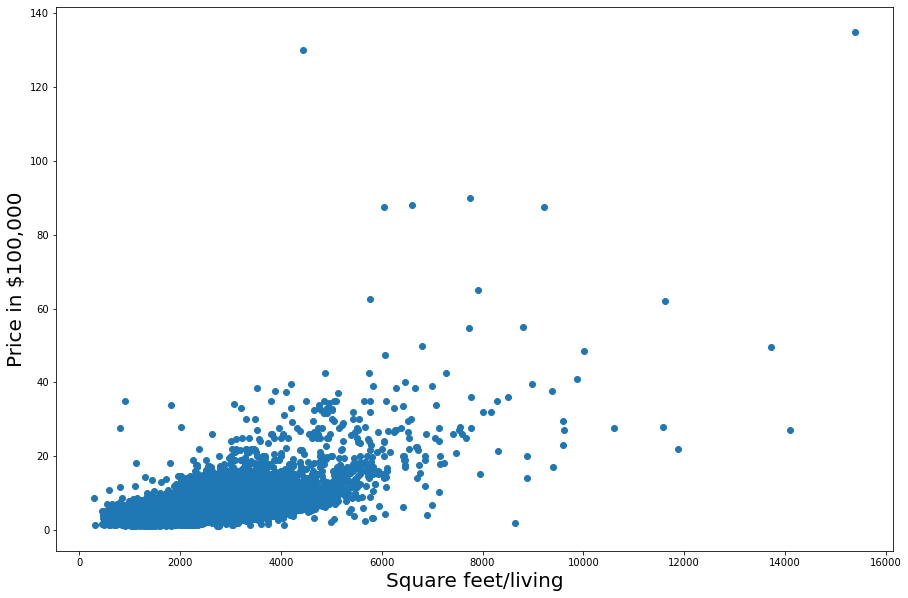

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df['livingAreaSqFt'], df['latestPrice']/100000)
plt.xlabel('Square feet/living', fontsize=20)
plt.ylabel('Price in $100,000', fontsize=20)
plt.show()

## Check for the outlier

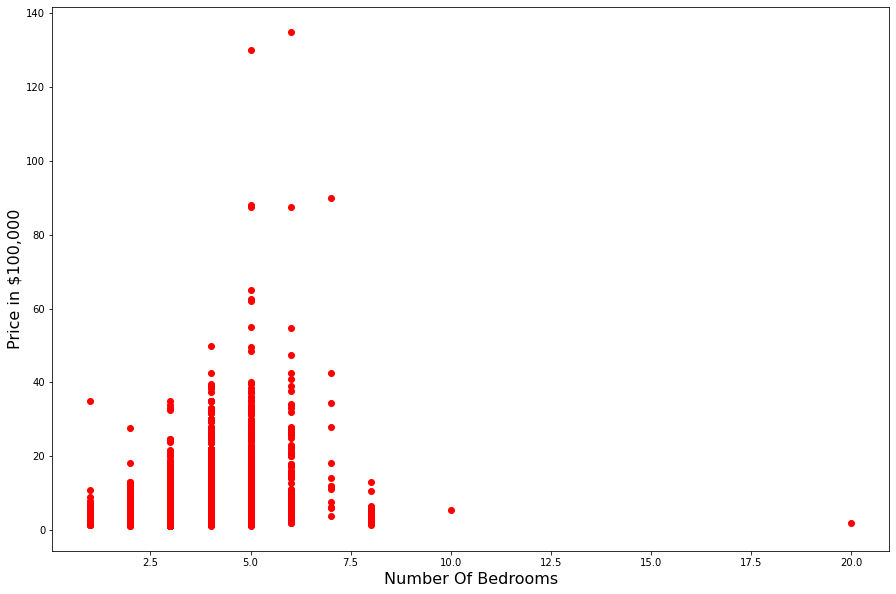

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x = df['numOfBedrooms'], y = df['latestPrice']/100000,c='red')
plt.ylabel('Price in $100,000', fontsize=16)
plt.xlabel('Number Of Bedrooms', fontsize=16)
plt.show()

# Time to remove outlier

In [20]:
#Check the outlier, 20 bedrooms houses
df_Bed = df[['numOfBedrooms', 'numOfBathrooms', 'latestPrice', 'lotSizeSqFt', 'livingAreaSqFt']]
Bed_sorted = df_Bed.sort_values('numOfBedrooms', ascending=False).head(10)

print(Bed_sorted)

       numOfBedrooms  numOfBathrooms  latestPrice  lotSizeSqFt  livingAreaSqFt
8597              20             2.0     174900.0       5227.0           916.0
5103              10             7.0     525000.0      12632.4          3725.0
8531               8             4.0     650000.0       9191.0          4712.0
14530              8             5.0    1299000.0       7405.0          5400.0
23                 8             5.0     350000.0     107593.2          1216.0
15065              8             8.0    1050000.0       9016.0          3750.0
3452               8             8.0     560000.0       8058.0          3872.0
3509               8             8.0     615000.0      11761.2          4128.0
3504               8             4.0     359000.0      12632.4          3120.0
13071              8             4.0     260000.0       6969.0          3344.0


In [21]:
#we can see there is something wrong on the house with 20 bedrooms and 10 bedrooms, such as latestPrice($174,900), 
#Area of living, and number of bathroom).
#we need to remove this outlier.

df.drop(index=[8597, 5103], inplace=True)

#after removing the outlier
df_Bed = df[['numOfBedrooms', 'numOfBathrooms', 'latestPrice', 'lotSizeSqFt', 'livingAreaSqFt']]
Bed_sorted = df_Bed.sort_values('numOfBedrooms', ascending=False).head(10)

print(Bed_sorted)

       numOfBedrooms  numOfBathrooms  latestPrice  lotSizeSqFt  livingAreaSqFt
12054              8             4.0     194000.0      10715.0          3120.0
3502               8             4.0     359000.0      10236.0          3120.0
4974               8             8.0     225000.0       8537.0          3752.0
12956              8             4.0     415000.0       6882.0          3360.0
11527              8             4.0     510000.0       7753.0          2952.0
8531               8             4.0     650000.0       9191.0          4712.0
3641               8             4.0     499000.0       9453.0          3072.0
13071              8             4.0     260000.0       6969.0          3344.0
3452               8             8.0     560000.0       8058.0          3872.0
23                 8             5.0     350000.0     107593.2          1216.0


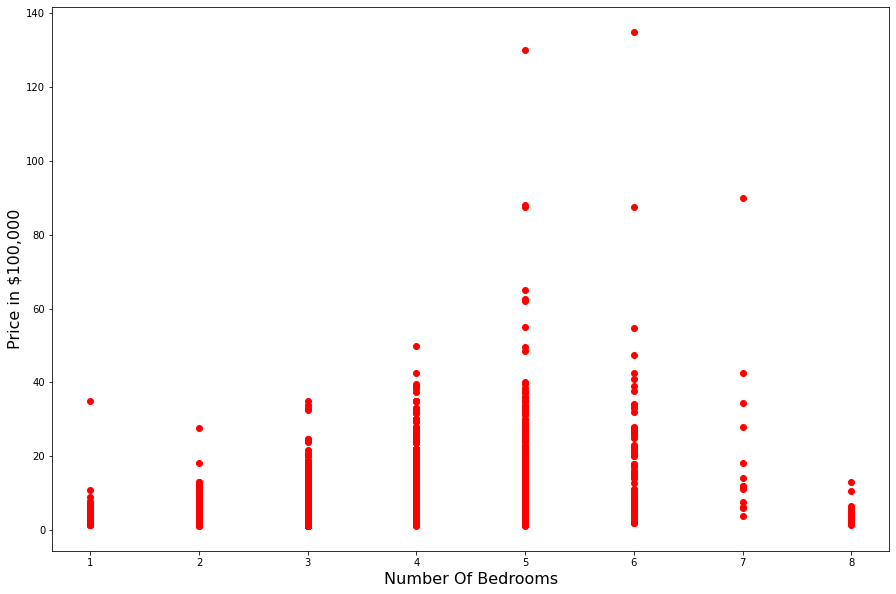

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x = df['numOfBedrooms'], y = df['latestPrice']/100000,c='red')
plt.ylabel('Price in $100,000', fontsize=16)
plt.xlabel('Number Of Bedrooms', fontsize=16)
plt.show()

In [23]:
df.describe()

zpid       zipcode      latitude     longitude  \
count  1.497400e+04  14974.000000  14974.000000  14974.000000   
mean   1.043637e+08  78736.026980     30.291781    -97.778845   
std    3.174163e+08     18.800483      0.097274      0.084736   
min    2.858495e+07  78617.000000     30.085030    -98.022057   
25%    2.941135e+07  78727.000000     30.203022    -97.838408   
50%    2.949499e+07  78739.000000     30.284886    -97.769760   
75%    7.033861e+07  78749.000000     30.367270    -97.718309   
max    2.146313e+09  78759.000000     30.517323    -97.570633   

       propertyTaxRate  garageSpaces  parkingSpaces     yearBuilt  \
count     14974.000000  14974.000000   14974.000000  14974.000000   
mean          1.994216      1.235007       1.230266   1988.690530   
std           0.053338      1.353353       1.353995     21.475357   
min           1.980000      0.000000       0.000000   1905.000000   
25%           1.980000      0.000000       0.000000   1975.000000   
50%           1.980000      1.000000       1.000000   1993.000000   
75%           1.980000      2.000000       2.000000   2006.000000   
max           2.210000     22.000000      22.000000   2020.000000   

        latestPrice  numPriceChanges  latest_salemonth  latest_saleyear  \
count  1.497400e+04      14974.00000      14974.000000     14974.000000   
mean   5.137068e+05          3.01910          6.732403      2019.078135   
std    4.420853e+05          2.47124          3.144558         0.814391   
min    1.000000e+05          1.00000          1.000000      2018.000000   
25%    3.099000e+05          1.00000          4.000000      2018.000000   
50%    4.050000e+05          2.00000          7.000000      2019.000000   
75%    5.750000e+05          4.00000          9.000000      2020.000000   
max    1.350000e+07         23.00000         12.000000      2021.000000   

        numOfPhotos  numOfAccessibilityFeatures  numOfAppliances  \
count  14974.000000                14974.000000     14974.000000   
mean      30.801322                    0.013089         3.495125   
std       21.133229                    0.180428         1.881963   
min        1.000000                    0.000000         0.000000   
25%       20.000000                    0.000000         2.000000   
50%       29.000000                    0.000000         3.000000   
75%       39.000000                    0.000000         4.000000   
max      179.000000                    8.000000        12.000000   

       numOfParkingFeatures  numOfPatioAndPorchFeatures  \
count          14974.000000                14974.000000   
mean               1.713637                    0.669093   
std                0.783354                    0.986564   
min                0.000000                    0.000000   
25%                1.000000                    0.000000   
50%                2.000000                    0.000000   
75%                2.000000                    1.000000   
max                6.000000                    8.000000   

       numOfSecurityFeatures  numOfWaterfrontFeatures  numOfWindowFeatures  \
count           14974.000000             14974.000000         14974.000000   
mean                0.471016                 0.002671             0.210031   
std                 0.827745                 0.059995             0.489552   
min                 0.000000                 0.000000             0.000000   
25%                 0.000000                 0.000000             0.000000   
50%                 0.000000                 0.000000             0.000000   
75%                 1.000000                 0.000000             0.000000   
max                 6.000000                 2.000000             4.000000   

       numOfCommunityFeatures   lotSizeSqFt  livingAreaSqFt  \
count            14974.000000  1.497400e+04    14974.000000   
mean                 0.018966  1.203770e+05     2198.508882   
std                  0.207811  1.233305e+07     1024.056257   
min                  0.000000  

## Taking log transform of the latestPrice as its positivitly skewed

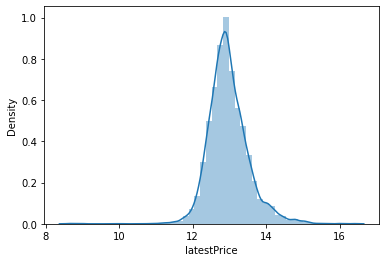

In [24]:
data['latestPrice'] = np.log(data['latestPrice'])
sns.distplot(data['latestPrice']);

#The result became symmetrical.

In [25]:
#skewness and kurtosis
print("Skewness: %f" % df['latestPrice'].skew())
print("Kurtosis: %f" % df['latestPrice'].kurt())


Skewness: 8.205675
Kurtosis: 146.166549


## Plotting longitude and latitude areas to see if how all 3 variables varies with prices

In [26]:
house_map_plot = df[['longitude','latitude', 'latestPrice','livingAreaSqFt']]

No handles with labels found to put in legend.


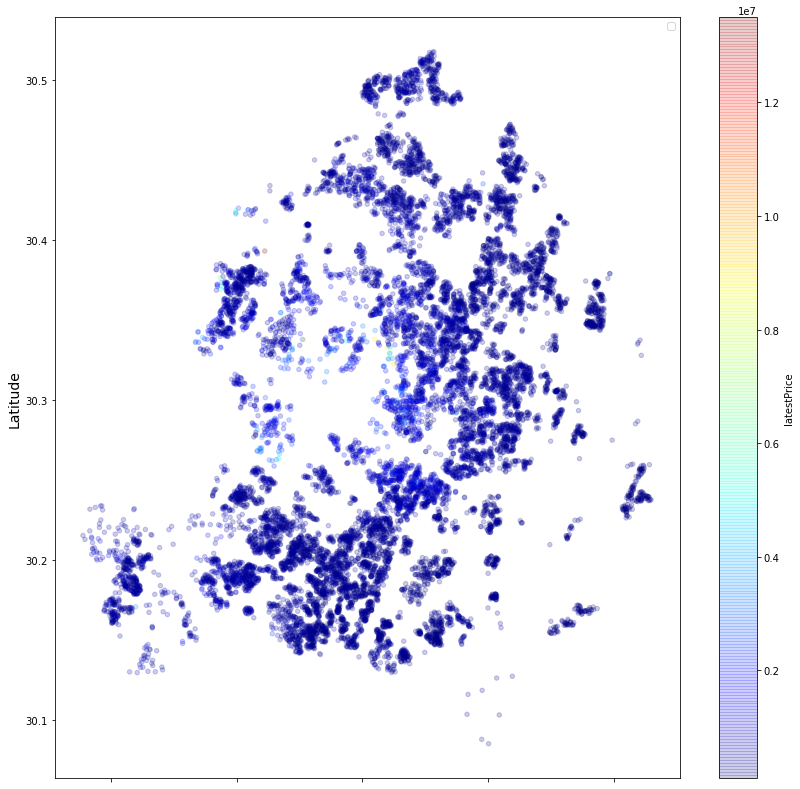

In [27]:
house_map_plot.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2,
				figsize=(14,14),
				c='latestPrice', cmap=plt.get_cmap('jet'), colorbar=True)


plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()
## proves that locations close to city center are more expensive

In [28]:
df.head()

zpid          city          streetAddress  zipcode  \
0   111373431  pflugerville   14424 Lake Victor Dr    78660   
1   120900430  pflugerville     1104 Strickling Dr    78660   
2  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
3   120901374  pflugerville     1025 Strickling Dr    78660   
4    60134862  pflugerville  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  hasCooling  hasGarage  \
0             1.98             2            True        True       True   
1             1.98             2            True        True       True   
2             1.98             0            True        True      False   
3             1.98             2            True        True       True   
4             1.98             0            True        True      False   

   hasHeating  hasSpa  hasView       homeType  parkingSpaces  yearBuilt  \
0        True   False    False  Single Family              2       2012   
1        True   False    False  Single Family              2       2013   
2        True   False    False  Single Family              0       2018   
3        True   False    False  Single Family              2       2013   
4        True   False    False  Single Family              0       2002   

   latestPrice  numPriceChanges latest_saledate  latest_salemonth  \
0     305000.0                5      2019-09-02                 9   
1     295000.0                1      2020-10-13                10   
2     256125.0                1      2019-07-31                 7   
3     240000.0                4      2018-08-08                 8   
4     239900.0                3      2018-10-31                10   

   latest_saleyear                                latestPriceSource  \
0             2019  Coldwell Banker United, Realtors - South Austin   
1             2020                                   Agent Provided   
2             2019                                   Agent Provided   
3             2018                                   Agent Provided   
4             2018                                   Agent Provided   

   numOfPhotos  numOfAccessibilityFeatures  numOfAppliances  \
0           39                           0                5   
1           29                           0                1   
2            2                           0                4   
3            9                           0                0   
4           27                           0                0   

   numOfParkingFeatures  numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
0                     2                           1                      3   
1                     2                           0                      0   
2                     1                           0                      1   
3                     2                           0                      0   
4                     1                           0                      0   

   numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
0                        0                    1                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  numOfElementarySchools  \
0       6011.0          2601.0         

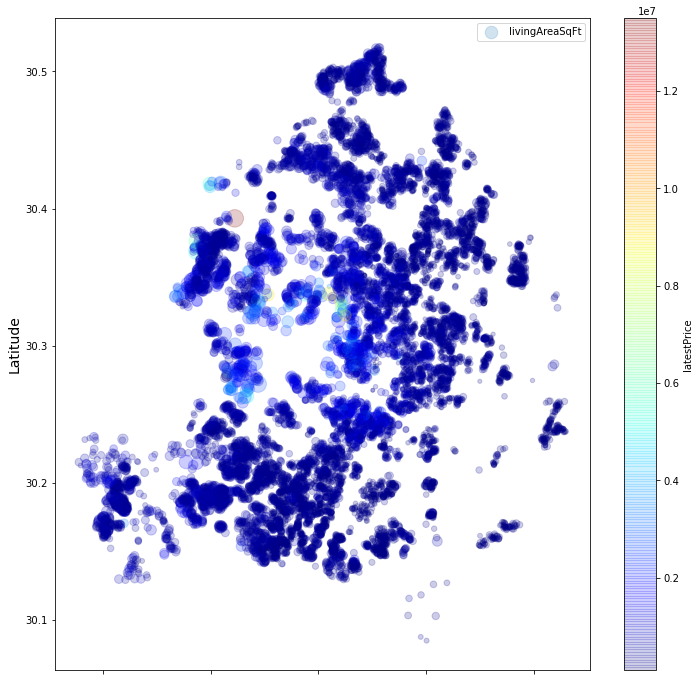

In [29]:
house_map_plot.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2,
				s=house_map_plot['livingAreaSqFt']/50, label='livingAreaSqFt', figsize=(12,12),
				c='latestPrice', cmap=plt.get_cmap('jet'), colorbar=True)


plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()
## proves that locations close to city center and larger livingAreaSqFt are more expensive

## Removing all categorically data to see correlation 

In [30]:
#working with only numbers right now
df_c = data.select_dtypes(include='number')
df_c.head()

zpid  zipcode   latitude  longitude  propertyTaxRate  garageSpaces  \
0   111373431    78660  30.430632 -97.663078             1.98             2   
1   120900430    78660  30.432673 -97.661697             1.98             2   
2  2084491383    78660  30.409748 -97.639771             1.98             0   
3   120901374    78660  30.432112 -97.661659             1.98             2   
4    60134862    78660  30.437368 -97.656860             1.98             0   

   parkingSpaces  yearBuilt  latestPrice  numPriceChanges  latest_salemonth  \
0              2       2012    12.628067                5                 9   
1              2       2013    12.594731                1                10   
2              0       2018    12.453421                1                 7   
3              2       2013    12.388394                4                 8   
4              0       2002    12.387977                3                10   

   latest_saleyear  numOfPhotos  numOfAccessibilityFeatures  numOfAppliances  \
0             2019           39                           0                5   
1             2020           29                           0                1   
2             2019            2                           0                4   
3             2018            9                           0                0   
4             2018           27                           0                0   

   numOfParkingFeatures  numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
0                     2                           1                      3   
1                     2                           0                      0   
2                     1                           0                      1   
3                     2                           0                      0   
4                     1                           0                      0   

   numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
0                        0                    1                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  numOfElementarySchools  \
0       6011.0          2601.0                    1                       0   
1       6185.0          1768.0                    1                       0   
2       7840.0          1478.0                    0                       2   
3       6098.0          1678.0                    1                       0   
4       6708.0          2132.0                    1                       0   

   numOfMiddleSchools  numOfHighSchools  avgSchoolDistance  avgSchoolRating  \
0                   1                 1           1.266667         2.666667   
1                   1                 1           1.400000         2.666667   
2                   1                 1           1.200000         3.000000   
3                   1                 1           1.400000         2.666667   
4                   1                 1           1.133333         4.000000   

   avgSchoolSize  MedianStudentsPerTeacher  numOfBathrooms  numOfBedrooms  \
0           1063                        14             3.0              4   
1           1063                        14             2.0              4   
2           1108                        14             2.0              3   
3           1063                        14             2.0              3   
4           1223                        14             3.0              3   

   numOfStories  
0             2  
1             1  
2             1  
3             1  
4             2

In [31]:
df_c.dtypes

zpid                            int64
zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_salemonth                int64
latest_saleyear                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleSchools              int64
numOfHighSch

In [32]:
data.head()

zpid          city          streetAddress  zipcode  \
0   111373431  pflugerville   14424 Lake Victor Dr    78660   
1   120900430  pflugerville     1104 Strickling Dr    78660   
2  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
3   120901374  pflugerville     1025 Strickling Dr    78660   
4    60134862  pflugerville  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  hasCooling  hasGarage  \
0             1.98             2            True        True       True   
1             1.98             2            True        True       True   
2             1.98             0            True        True      False   
3             1.98             2            True        True       True   
4             1.98             0            True        True      False   

   hasHeating  hasSpa  hasView       homeType  parkingSpaces  yearBuilt  \
0        True   False    False  Single Family              2       2012   
1        True   False    False  Single Family              2       2013   
2        True   False    False  Single Family              0       2018   
3        True   False    False  Single Family              2       2013   
4        True   False    False  Single Family              0       2002   

   latestPrice  numPriceChanges latest_saledate  latest_salemonth  \
0    12.628067                5      2019-09-02                 9   
1    12.594731                1      2020-10-13                10   
2    12.453421                1      2019-07-31                 7   
3    12.388394                4      2018-08-08                 8   
4    12.387977                3      2018-10-31                10   

   latest_saleyear                                latestPriceSource  \
0             2019  Coldwell Banker United, Realtors - South Austin   
1             2020                                   Agent Provided   
2             2019                                   Agent Provided   
3             2018                                   Agent Provided   
4             2018                                   Agent Provided   

   numOfPhotos  numOfAccessibilityFeatures  numOfAppliances  \
0           39                           0                5   
1           29                           0                1   
2            2                           0                4   
3            9                           0                0   
4           27                           0                0   

   numOfParkingFeatures  numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
0                     2                           1                      3   
1                     2                           0                      0   
2                     1                           0                      1   
3                     2                           0                      0   
4                     1                           0                      0   

   numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
0                        0                    1                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  numOfElementarySchools  \
0       6011.0          2601.0         

In [33]:
df_c.corr()

zpid   zipcode  latitude  longitude  \
zpid                        1.000000 -0.052805 -0.055352   0.005886   
zipcode                    -0.052805  1.000000 -0.036440  -0.126135   
latitude                   -0.055352 -0.036440  1.000000   0.347597   
longitude                   0.005886 -0.126135  0.347597   1.000000   
propertyTaxRate            -0.011396 -0.172846  0.450187  -0.013746   
garageSpaces               -0.001927 -0.016600  0.019153  -0.115317   
parkingSpaces              -0.001410 -0.016687  0.018222  -0.114713   
yearBuilt                   0.213280 -0.016143 -0.116519  -0.252537   
latestPrice                 0.018454 -0.156960  0.104928  -0.305982   
numPriceChanges            -0.049541 -0.043115  0.013402  -0.050127   
latest_salemonth            0.012119  0.000116 -0.001667  -0.004023   
latest_saleyear             0.053438 -0.011057 -0.042536  -0.018003   
numOfPhotos                -0.012489 -0.011971  0.046059  -0.107296   
numOfAccessibilityFeatures  0.009341 -0.009582 -0.014039   0.015458   
numOfAppliances             0.007990  0.016811  0.007396  -0.024084   
numOfParkingFeatures       -0.065332 -0.084353  0.149610  -0.012009   
numOfPatioAndPorchFeatures  0.021894  0.005276 -0.017172  -0.086942   
numOfSecurityFeatures       0.050612  0.006647 -0.027001  -0.088481   
numOfWaterfrontFeatures    -0.008117 -0.006901  0.018687  -0.018438   
numOfWindowFeatures        -0.015926  0.015497  0.018692  -0.120293   
numOfCommunityFeatures     -0.005383 -0.004587  0.008238  -0.045765   
lotSizeSqFt                -0.001200 -0.014560  0.001960   0.000490   
livingAreaSqFt             -0.005400 -0.035656  0.084065  -0.334297   
numOfPrimarySchools         0.002835 -0.051990 -0.054942   0.163411   
numOfElementarySchools      0.001609  0.071017  0.128212  -0.029789   
numOfMiddleSchools         -0.002406 -0.024317 -0.019787  -0.220102   
numOfHighSchools            0.017113  0.054053  0.130216   0.452437   
avgSchoolDistance           0.047420  0.027830 -0.043530  -0.288116   
avgSchoolRating            -0.048422  0.055618  0.260637  -0.557531   
avgSchoolSize              -0.035425  0.140192  0.077653  -0.333619   
MedianStudentsPerTeacher   -0.064781  0.106682 -0.010083  -0.597129   
numOfBathrooms              0.052729 -0.055685  0.053388  -0.335719   
numOfBedrooms              -0.037354  0.025278  0.078542  -0.285123   
numOfStories               -0.001502 -0.051818  0.047176  -0.157333   

                            propertyTaxRate  garageSpaces  parkingSpaces  \
zpid                              -0.011396     -0.001927      -0.001410   
zipcode                           -0.172846     -0.016600      -0.016687   
latitude                           0.450187      0.019153       0.018222   
longitude                         -0.013746     -0.115317      -0.114713   
propertyTaxRate                    1.000000      0.026430       0.024371   
garageSpaces                       0.026430      1.000000       0.997321   
parkingSpaces                      0.024371      0.997321       1.000000   
yearBuilt                          0.118247      0.085982       0.085655   
latestPrice                       -0.051694      0.182974       0.181695   
numPriceChanges                   -0.028945      0.120748       0.121268   
latest_salemonth                   0.005714      0.102118       0.096451   
latest_saleyear                   -0.024598      0.311164       0.307044   
numOfPhotos                        0.030728      0.271191       0.271101   
numOfAccessibilityFeatures        -0.015598      0.070329       0.070547   
numOfAppliances                    0.018595      0.180231       0.174479   
numOfParkingFeatures               0.267883      0.642852       0.639867   
numOfPatioAndPorchFeatures         0.003888      0.235368       0.229767   
numOfSecurityFeatures              0.014315      0.161646       0.160045   
numOfWaterfrontFeatures           -0.007266      0.041336       0.041473   
numOfWindowFeatures       

In [34]:
import numpy as np

def top_entries(df):
    mat = df.corr().abs()
    
    # Remove duplicate and identity entries
    mat.loc[:,:] = np.tril(mat.values, k=-1)
    mat = mat[mat>0]

    # Unstack, sort ascending, and reset the index, so features are in columns
    # instead of indexes (allowing e.g. a pretty print in Jupyter).
    # Also rename these it for good measure.
    return (mat.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={
                 "level_0": "feature_a",
                 "level_1": "feature_b",
                 0: "correlation"
             }))

In [35]:
corr_df = top_entries(df_c)

In [36]:
#highest corr
corr_df.head()

feature_a                 feature_b  correlation
0         garageSpaces             parkingSpaces     0.997321
1  numOfPrimarySchools    numOfElementarySchools     0.832492
2      avgSchoolRating  MedianStudentsPerTeacher     0.734615
3         garageSpaces      numOfParkingFeatures     0.642852
4        parkingSpaces      numOfParkingFeatures     0.639867

<AxesSubplot:>

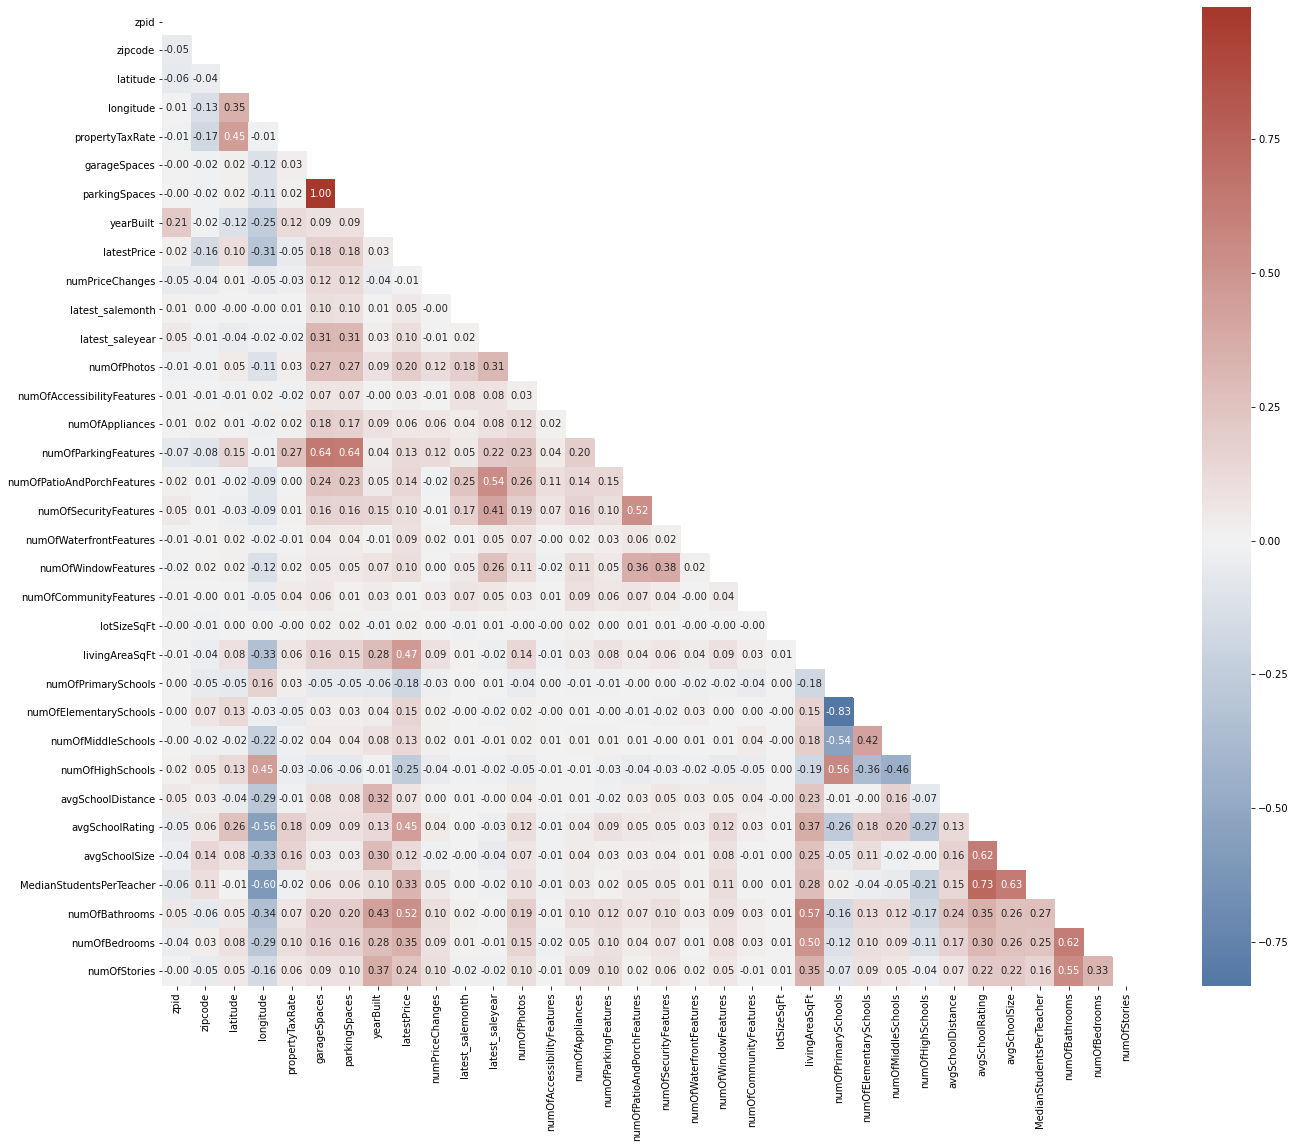

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
matrix = df_c.corr()

# Create a mask
plt.figure(figsize=(22,18))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

## Latest prices affect by 2 features positivitly (anything above 0.3)

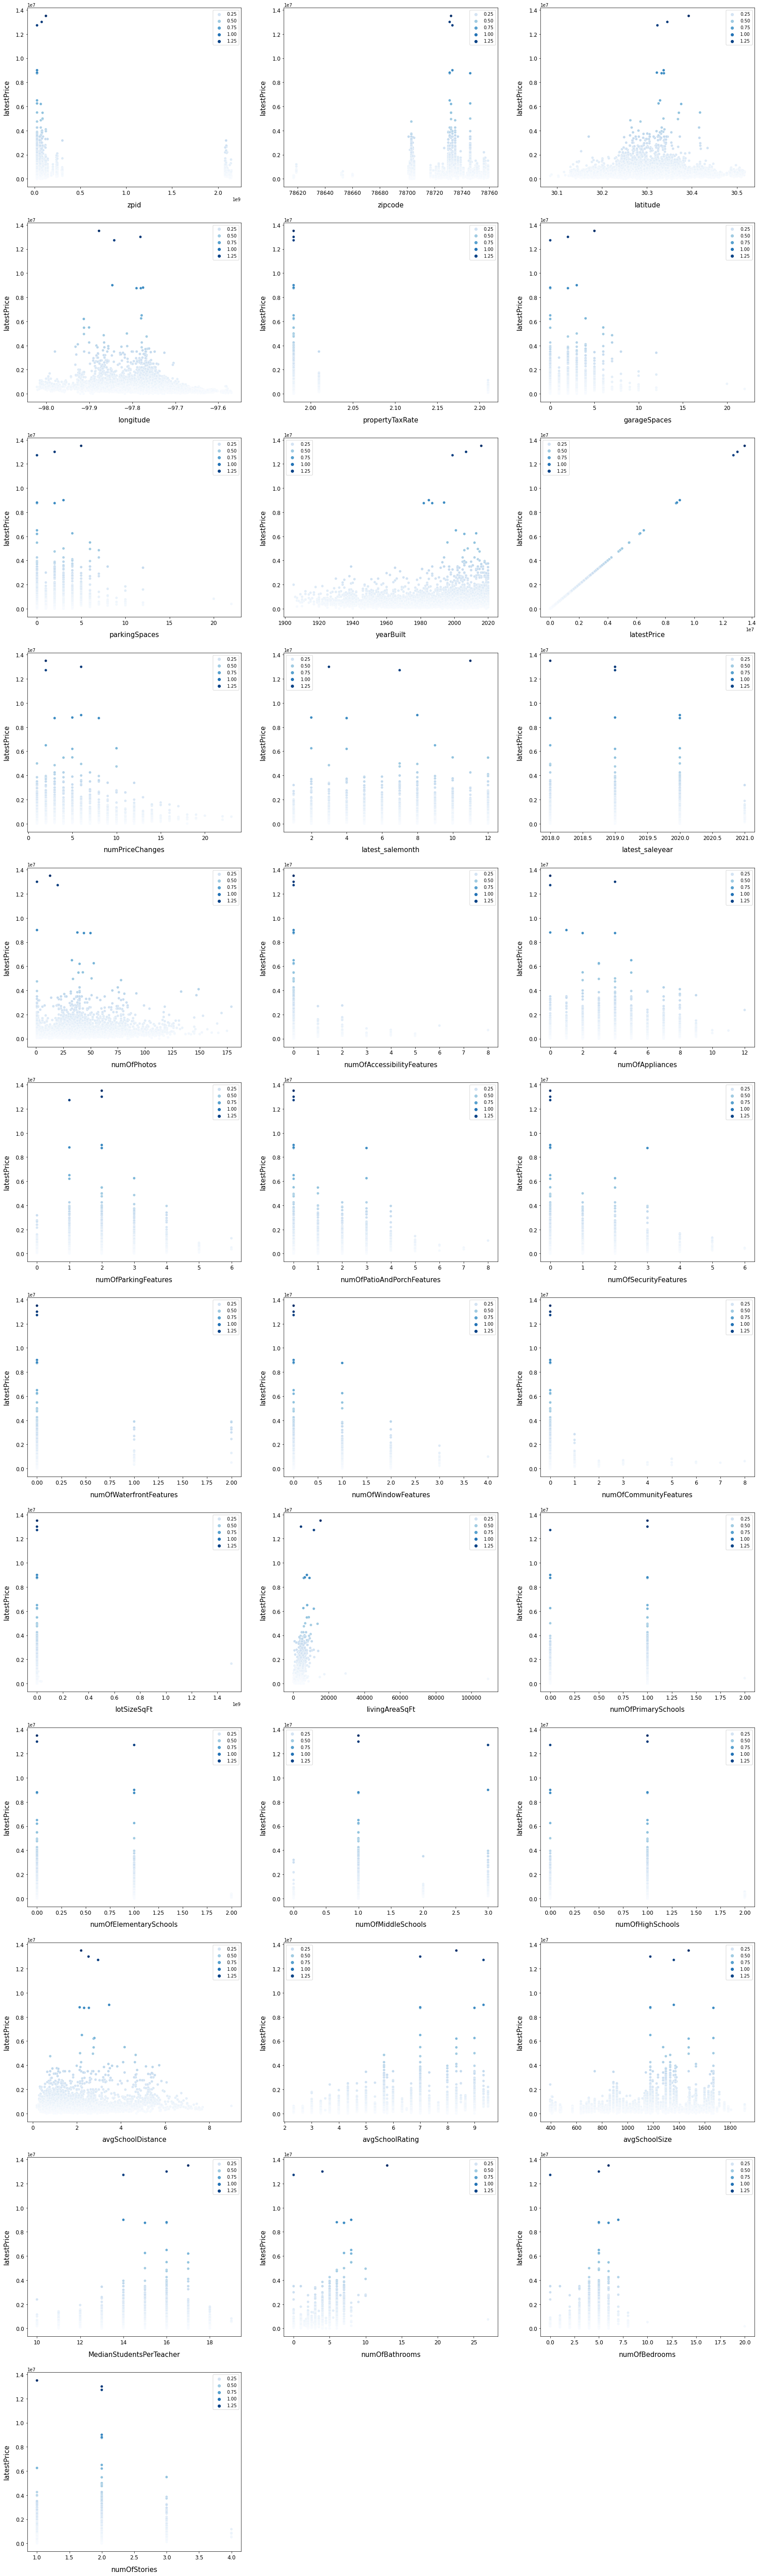

In [13]:
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
      numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(df[numeric]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='latestPrice', hue='latestPrice', palette='Blues', data=df)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('latestPrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

In [ ]:
df.dtypes

zpid                            int64
zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_salemonth                int64
latest_saleyear                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleSchools              int64
numOfHighSch

In [ ]:
df.corr()

zpid   zipcode  latitude  longitude  \
zpid                        1.000000 -0.052805 -0.055352   0.005886   
zipcode                    -0.052805  1.000000 -0.036440  -0.126135   
latitude                   -0.055352 -0.036440  1.000000   0.347597   
longitude                   0.005886 -0.126135  0.347597   1.000000   
propertyTaxRate            -0.011396 -0.172846  0.450187  -0.013746   
garageSpaces               -0.001927 -0.016600  0.019153  -0.115317   
parkingSpaces              -0.001410 -0.016687  0.018222  -0.114713   
yearBuilt                   0.213280 -0.016143 -0.116519  -0.252537   
latestPrice                 0.007503 -0.145946  0.071547  -0.184079   
numPriceChanges            -0.049541 -0.043115  0.013402  -0.050127   
latest_salemonth            0.012119  0.000116 -0.001667  -0.004023   
latest_saleyear             0.053438 -0.011057 -0.042536  -0.018003   
numOfPhotos                -0.012489 -0.011971  0.046059  -0.107296   
numOfAccessibilityFeatures  0.009341 -0.009582 -0.014039   0.015458   
numOfAppliances             0.007990  0.016811  0.007396  -0.024084   
numOfParkingFeatures       -0.065332 -0.084353  0.149610  -0.012009   
numOfPatioAndPorchFeatures  0.021894  0.005276 -0.017172  -0.086942   
numOfSecurityFeatures       0.050612  0.006647 -0.027001  -0.088481   
numOfWaterfrontFeatures    -0.008117 -0.006901  0.018687  -0.018438   
numOfWindowFeatures        -0.015926  0.015497  0.018692  -0.120293   
numOfCommunityFeatures     -0.005383 -0.004587  0.008238  -0.045765   
lotSizeSqFt                -0.001200 -0.014560  0.001960   0.000490   
livingAreaSqFt             -0.005400 -0.035656  0.084065  -0.334297   
numOfPrimarySchools         0.002835 -0.051990 -0.054942   0.163411   
numOfElementarySchools      0.001609  0.071017  0.128212  -0.029789   
numOfMiddleSchools         -0.002406 -0.024317 -0.019787  -0.220102   
numOfHighSchools            0.017113  0.054053  0.130216   0.452437   
avgSchoolDistance           0.047420  0.027830 -0.043530  -0.288116   
avgSchoolRating            -0.048422  0.055618  0.260637  -0.557531   
avgSchoolSize              -0.035425  0.140192  0.077653  -0.333619   
MedianStudentsPerTeacher   -0.064781  0.106682 -0.010083  -0.597129   
numOfBathrooms              0.052729 -0.055685  0.053388  -0.335719   
numOfBedrooms              -0.037354  0.025278  0.078542  -0.285123   
numOfStories               -0.001502 -0.051818  0.047176  -0.157333   

                            propertyTaxRate  garageSpaces  parkingSpaces  \
zpid                              -0.011396     -0.001927      -0.001410   
zipcode                           -0.172846     -0.016600      -0.016687   
latitude                           0.450187      0.019153       0.018222   
longitude                         -0.013746     -0.115317      -0.114713   
propertyTaxRate                    1.000000      0.026430       0.024371   
garageSpaces                       0.026430      1.000000       0.997321   
parkingSpaces                      0.024371      0.997321       1.000000   
yearBuilt                          0.118247      0.085982       0.085655   
latestPrice                       -0.062179      0.157443       0.156811   
numPriceChanges                   -0.028945      0.120748       0.121268   
latest_salemonth                   0.005714      0.102118       0.096451   
latest_saleyear                   -0.024598      0.311164       0.307044   
numOfPhotos                        0.030728      0.271191       0.271101   
numOfAccessibilityFeatures        -0.015598      0.070329       0.070547   
numOfAppliances                    0.018595      0.180231       0.174479   
numOfParkingFeatures               0.267883      0.642852       0.639867   
numOfPatioAndPorchFeatures         0.003888      0.235368       0.229767   
numOfSecurityFeatures              0.014315      0.161646       0.160045   
numOfWaterfrontFeatures           -0.007266      0.041336       0.041473   
numOfWindowFeatures       

In [ ]:
import numpy as np

def top_entries(df):
    mat = df.corr().abs()
    
    # Remove duplicate and identity entries
    mat.loc[:,:] = np.tril(mat.values, k=-1)
    mat = mat[mat>0]

    # Unstack, sort ascending, and reset the index, so features are in columns
    # instead of indexes (allowing e.g. a pretty print in Jupyter).
    # Also rename these it for good measure.
    return (mat.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={
                 "level_0": "feature_a",
                 "level_1": "feature_b",
                 0: "correlation"
             }))

In [ ]:
corr_df = top_entries(df)

In [ ]:
#highest corr
corr_df.head()

feature_a                 feature_b  correlation
0         garageSpaces             parkingSpaces     0.997321
1  numOfPrimarySchools    numOfElementarySchools     0.832492
2      avgSchoolRating  MedianStudentsPerTeacher     0.734615
3         garageSpaces      numOfParkingFeatures     0.642852
4        parkingSpaces      numOfParkingFeatures     0.639867

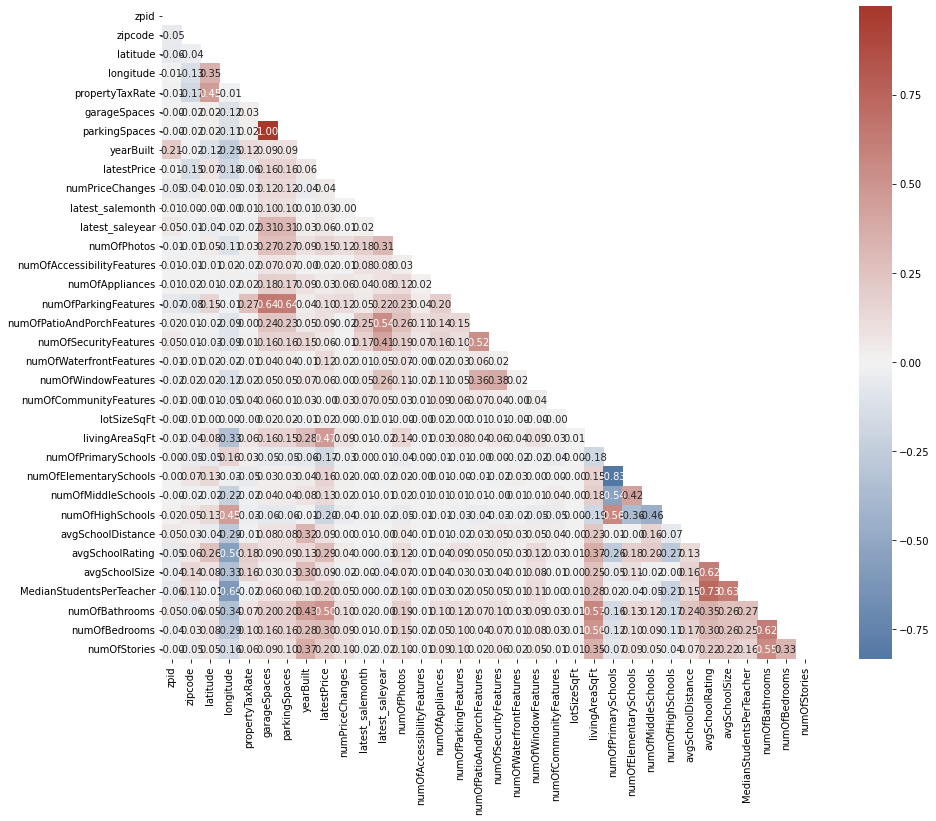

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
matrix = df.corr()

# Create a mask
plt.figure(figsize=(16,12))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

## Latest prices affect by 2 features positivitly (anything above 0.3)

In [ ]:
corr_df[corr_df["feature_a"] == "latestPrice"]

feature_a                   feature_b  correlation
16   latestPrice              numOfBathrooms     0.504738
18   latestPrice              livingAreaSqFt     0.467034
42   latestPrice               numOfBedrooms     0.299839
44   latestPrice             avgSchoolRating     0.293101
77   latestPrice            numOfHighSchools     0.201821
79   latestPrice                numOfStories     0.200555
82   latestPrice    MedianStudentsPerTeacher     0.198208
95   latestPrice         numOfPrimarySchools     0.170927
113  latestPrice      numOfElementarySchools     0.155988
115  latestPrice                 numOfPhotos     0.154355
131  latestPrice          numOfMiddleSchools     0.127838
134  latestPrice     numOfWaterfrontFeatures     0.123979
167  latestPrice        numOfParkingFeatures     0.098384
175  latestPrice           avgSchoolDistance     0.094156
186  latestPrice  numOfPatioAndPorchFeatures     0.087936
194  latestPrice               avgSchoolSize     0.085167
235  latestPrice             latest_saleyear     0.059942
238  latestPrice       numOfSecurityFeatures     0.058349
243  latestPrice         numOfWindowFeatures     0.056141
313  latestPrice             numPriceChanges     0.038305
330  latestPrice            latest_salemonth     0.033898
333  latestPrice             numOfAppliances     0.033114
385  latestPrice                 lotSizeSqFt     0.020940
415  latestPrice  numOfAccessibilityFeatures     0.016270
541  latestPrice      numOfCommunityFeatures     0.001334
597  latestPrice                        zpid          NaN
598  latestPrice                     zipcode          NaN
599  latestPrice                    latitude          NaN
600  latestPrice                   longitude          NaN
601  latestPrice             propertyTaxRate          NaN
602  latestPrice                garageSpaces          NaN
603  latestPrice               parkingSpaces          NaN
604  latestPrice                   yearBuilt          NaN
605  latestPrice                 latestPrice          NaN

In [ ]:
#Next Steps:
#Outlier removal.
#Feature Engineering; setting some categorical data.
#I'll run two model on situations; one without NLP and Images and one with both (need to search here)

In [4]:
data.sort_values('livingAreaSqFt', ascending=False).head(5)

zpid    city         streetAddress  zipcode  \
705     70330356  austin         201 Marly Way    78733   
2557    64523076  austin        9704 Saugus Ln    78733   
10588   29476730  austin  3303 Garden Villa Ln    78704   
2316   125904370  austin        12400 Cedar St    78732   
14257   29344391  austin  5102 Beverly Skyline    78731   

                                             description   latitude  \
705    Level building site with great canyon views an...  30.323517   
2557   New Construction, EANES Schools, 4bed 3 bath, ...  30.345898   
10588  3303 Garden Villa Ln, Austin, TX 78704 is a va...  30.234896   
2316   12400 Cedar Street - Villa Del Lago is a uniqu...  30.392859   
14257  Large lot near Highland Park Elementary in the...  30.335943   

       longitude  propertyTaxRate  garageSpaces  hasAssociation  ...  \
705   -97.861473             1.98             0            True  ...   
2557  -97.859985             1.98             0            True  ...   
10588 -97.770287             1.98             2           False  ...   
2316  -97.877609             1.98             5           False  ...   
14257 -97.765388             1.98             0           False  ...   

       numOfMiddleSchools  numOfHighSchools  avgSchoolDistance  \
705                     3                 0           3.233333   
2557                    3                 0           4.300000   
10588                   1                 1           1.166667   
2316                    1                 1           2.200000   
14257                   1                 1           1.466667   

       avgSchoolRating  avgSchoolSize MedianStudentsPerTeacher  \
705           8.000000           1373                       14   
2557          8.000000           1373                       14   
10588         3.666667            861                       12   
2316          8.333333           1476                       17   
14257         7.000000           1177                       16   

       numOfBathrooms  numOfBedrooms  numOfStories  \
705               0.0              5             2   
2557              0.0              1             2   
10588             0.0              6             2   
2316             13.0              6             1   
14257             0.0              3             2   

                                               homeImage  
705    70330356_streetviewsize1025x768location30.3235...  
2557   64523076_streetviewlocation9704SaugusLn2CAusti...  
10588  29476730_streetviewlocation3303GardenVillaLn2C...  
2316   125904370_a200adec53a31c17278601026747d1ae-p_f...  
14257  29344391_d16fa4e175f2edba3425e88d41c5847b-p_f.jpg  

[5 rows x 47 columns]

In [5]:
data.iloc[705]

zpid                                                                   70330356
city                                                                     austin
streetAddress                                                     201 Marly Way
zipcode                                                                   78733
description                   Level building site with great canyon views an...
latitude                                                              30.323517
longitude                                                            -97.861473
propertyTaxRate                                                            1.98
garageSpaces                                                                  0
hasAssociation                                                             True
hasCooling                                                                 True
hasGarage                                                                 False
hasHeating                              

In [6]:
data.drop(index=[705], inplace=True)

In [7]:
data.zipcode.unique

<bound method Series.unique of 0        78660
1        78660
2        78660
3        78660
4        78660
         ...  
15166    78748
15167    78741
15168    78704
15169    78722
15170    78702
Name: zipcode, Length: 15170, dtype: int64>

In [19]:
zipcode_data = data.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace=True)

data['count'] = 1
count_houses_zipcode = data.groupby('zipcode').sum()
count_houses_zipcode.reset_index(inplace=True)
count_houses_zipcode = count_houses_zipcode[['zipcode','count']]
data.drop(['count'], axis = 1, inplace = True)

zipcode_data = pd.merge(zipcode_data, count_houses_zipcode, how='left', on=['zipcode'])
zipcode_data.head(10)

zipcode          zpid   latitude  longitude  propertyTaxRate  garageSpaces  \
0    78617  8.119361e+07  30.164515 -97.634066           1.9800      0.802326   
1    78619  2.018068e+08  30.136291 -97.975780           2.0100      1.666667   
2    78652  1.176957e+09  30.147471 -97.846363           1.9875      2.000000   
3    78653  6.198561e+08  30.348232 -97.603903           1.9800      3.500000   
4    78660  3.428485e+08  30.423477 -97.651394           1.9800      1.083333   
5    78701  5.296402e+07  30.273001 -97.746111           1.9800      1.750000   
6    78702  1.679477e+08  30.265521 -97.715284           1.9800      0.969773   
7    78703  8.430499e+07  30.294035 -97.764191           1.9800      1.248344   
8    78704  1.279562e+08  30.243964 -97.763756           1.9800      1.235127   
9    78705  1.685968e+08  30.295045 -97.737286           1.9800      1.176471   

   hasAssociation  hasCooling  hasGarage  hasHeating  ...  numOfMiddleSchools  \
0        0.930233    1.000000   0.383721    1.000000  ...            1.000000   
1        1.000000    1.000000   0.583333    1.000000  ...            1.583333   
2        1.000000    1.000000   1.000000    1.000000  ...            1.000000   
3        0.500000    1.000000   0.750000    1.000000  ...            1.000000   
4        1.000000    0.861111   0.527778    0.861111  ...            1.000000   
5        0.875000    0.875000   0.625000    0.875000  ...            1.000000   
6        0.108312    0.853904   0.528967    0.924433  ...            1.000000   
7        0.135762    0.976821   0.582781    0.993377  ...            0.986755   
8        0.208215    0.964589   0.643059    0.992918  ...            0.995751   
9        0.382353    0.941176   0.573529    0.970588  ...            0.985294   

   numOfHighSchools  avgSchoolDistance  avgSchoolRating  avgSchoolSize  \
0          1.000000           1.125581         3.158915    1616.418605   
1          0.416667           4.475000         7.388889     934.000000   
2          0.750000           2.275000         4.500000    1263.000000   
3          1.750000           3.050000         4.250000    1160.500000   
4          1.000000           1.283333         3.277778    1087.666667   
5          1.000000           1.558333         6.000000    1191.625000   
6          1.000000           1.212930         4.827036     679.682620   
7          0.986755           1.031192         6.738791    1271.155629   
8          0.995751           1.015932         4.938625    1004.475921   
9          0.985294           1.425073         6.761451    1165.632353   

   MedianStudentsPerTeacher  numOfBathrooms  numOfBedrooms  numOfStories  \
0                 13.965116        2.302326       3.302326      1.348837   
1                 15.666667        4.333333       4.166667      1.000000   
2                 14.250000        2.500000       3.500000      1.250000   
3                 11.750000        3.000000       3.500000      1.250000   
4                 13.305556        2.486111       3.444444      1.500000   
5                 16.000000        2.750000       2.500000      1.375000   
6                 12.415617        2.072418       2.740554      1.382872   
7                 15.986755        3.171358       3.420530      1.599338   
8                 14.164306        2.609773       3.084986      1.556657   
9                 15.411765        2.102941       2.852941      1.352941   

   count  
0     86  
1     12  
2      4  
3      4  
4     36  
5      8  
6    397  
7    302  
8    706  
9     68  

[10 rows x 41 columns]

In [20]:
import folium as folium

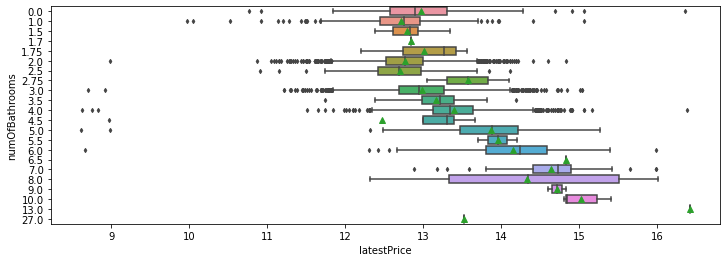

point biserial correlation r is 0.5193818542189641 with p = 0.0


In [28]:
from scipy import stats
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'numOfBathrooms', x = 'latestPrice', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

# Calculate the correlation coefficient
r, p = stats.pointbiserialr(data['numOfBathrooms'], data['latestPrice'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

In [10]:
data.loc[(data['numOfBathrooms']==0) & (data['numOfBedrooms']>0) & (data['yearBuilt'] > 1989), 'numOfBathrooms'] = 2
data.loc[(data['numOfBathrooms']==0) & (data['numOfBedrooms']>0) & (data['yearBuilt'] <= 1989), 'numOfBathrooms'] = 1
data.loc[(data['numOfBathrooms']==0) & (data['numOfBedrooms']>=3) & (data['yearBuilt'] > 1989), 'numOfBathrooms'] = 2.5
data.loc[(data['numOfBathrooms']==0) & (data['numOfBedrooms']>=3) & (data['yearBuilt'] <= 1989), 'numOfBathrooms'] = 2

data.drop(data[data['numOfBathrooms']==0].index, inplace=True)
data.drop(data[data['numOfBedrooms']==0].index, inplace=True)

In [14]:
data.loc[data.index==8597, 'numOfBedrooms'] = 2

In [16]:
data.loc[(data['garageSpaces'] > 3) & (data['latestPrice'] < 1000000) & (data['homeType'] == 'Single Family'), 'garageSpaces'] = 3
data.loc[(data['garageSpaces'] > 5) & (data['latestPrice'] > 1000000)& (data['homeType'] == 'Single Family'), 'garageSpaces'] = 4
data.loc[data.index==6885, 'garageSpaces'] = 2


In [18]:
data.loc[(data['parkingSpaces'] > 3) & (data['latestPrice'] < 1000000 & (data['homeType'] == 'Single Family')), 'parkingSpaces'] = 3
data.loc[(data['parkingSpaces'] > 5) & (data['latestPrice'] > 1000000& (data['homeType'] == 'Single Family')), 'parkingSpaces'] = 5
data.loc[data.index==6885, 'parkingSpaces'] = 2

data.sort_values('parkingSpaces', ascending=False).head(5)


zpid    city        streetAddress  zipcode  \
5685   29359930  austin       12717 Oxen Way    78732   
5205   29507462  austin      10102 Dobbin Dr    78748   
11232  29402157  austin    1708 Broadmoor Dr    78723   
1562   28594273  austin      8100 Coyote Rdg    78737   
8704   58305104  austin  11614 Fast Horse Dr    78759   

                                             description   latitude  \
5685   Dream location in Steiner Ranch, this gem offe...  30.375324   
5205   Rare find in desired South Austin location.  N...  30.180552   
11232  Welcome to your updated mid-century-marvelous ...  30.306007   
1562   Hill Country Paradise Two acres atop the highe...  30.137091   
8704   11614 Fast Horse Dr, Austin, TX 78759 is a sin...  30.413668   

       longitude  propertyTaxRate  garageSpaces  hasAssociation  ...  \
5685  -97.895241             1.98             3            True  ...   
5205  -97.850784             1.98             3           False  ...   
11232 -97.696159             1.98             3           False  ...   
1562  -97.966713             2.01             3            True  ...   
8704  -97.740761             1.98             3           False  ...   

       numOfMiddleSchools  numOfHighSchools  avgSchoolDistance  \
5685                    1                 1           2.033333   
5205                    1                 1           1.366667   
11232                   1                 1           1.666667   
1562                    1                 1           5.266667   
8704                    1                 1           2.233333   

       avgSchoolRating  avgSchoolSize MedianStudentsPerTeacher  \
5685          8.333333           1476                       17   
5205          7.333333           1633                       17   
11232         5.000000            966                       15   
1562          7.000000           1137                       16   
8704          6.000000           1474                       15   

       numOfBathrooms  numOfBedrooms  numOfStories  \
5685              2.0              3             1   
5205              2.0              4             1   
11232             2.0              3             1   
1562              4.0              5             2   
8704              2.0              3             1   

                                               homeImage  
5685   29359930_8aff5a668cf017981ab0af6b4db6ecb0-p_f.jpg  
5205   29507462_2b7eaeb0bff9a673efee1d92e51fe21d-p_f.jpg  
11232  29402157_streetviewlocation1708BroadmoorDr2CAu...  
1562   28594273_31d294369af366713c646ef3342719fc-p_f.jpg  
8704   58305104_be5e071ba44d50a4055468eb6befc375-p_f.jpg  

[5 rows x 47 columns]

In [21]:
zipsorted = pd.DataFrame(data.groupby('zipcode')['latestPrice'].median().sort_values(ascending=True))

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)), 1)[0]+1

In [22]:
# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
data['zip_rank'] = data['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

# apply the median home price per zip code to the data frame
data['median_zip'] = data['zipcode'].apply(lambda x: round(data.loc[data['zipcode']==x]['latestPrice'].median(), 0))

''

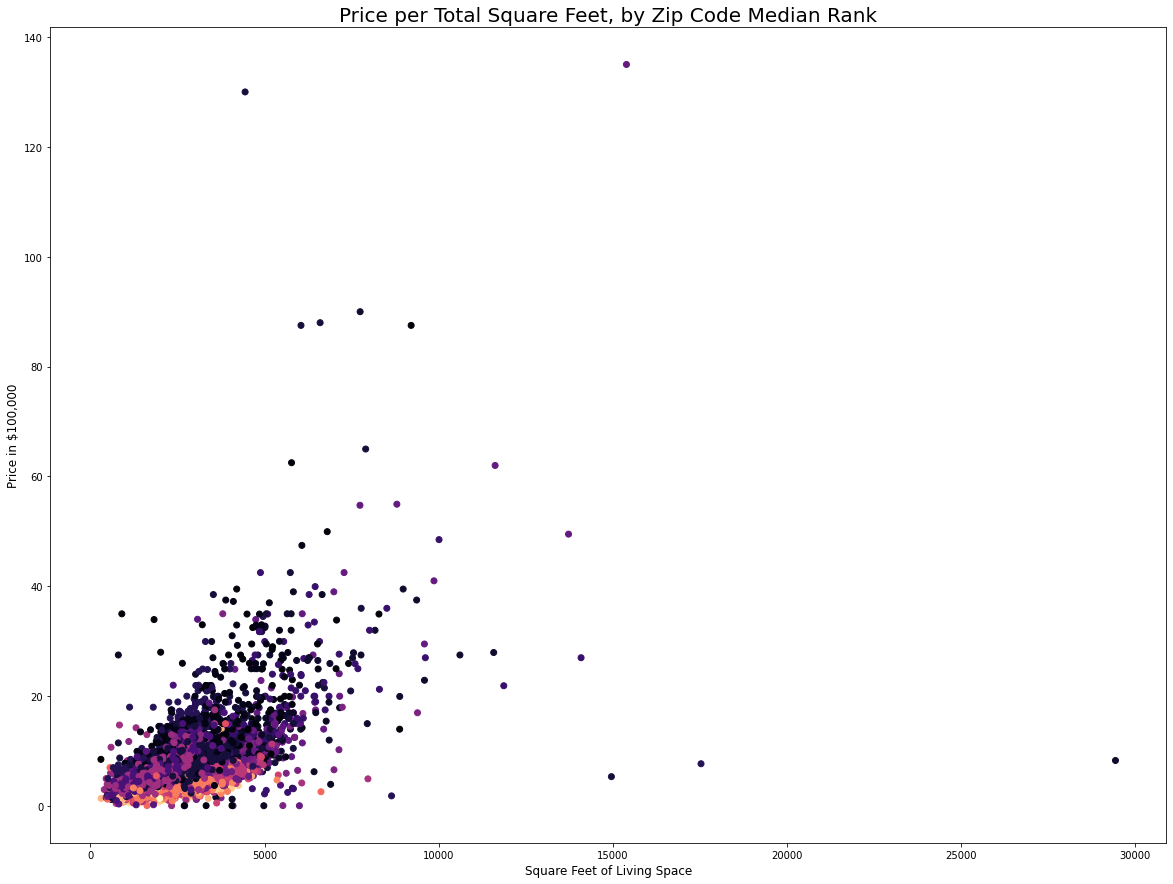

In [23]:
# visualize zip code as a color function, on a plot of price per square footage

fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(data['livingAreaSqFt'], data['latestPrice'] /100000, c=data['zip_rank'], cmap='magma_r')

ax.set_xlabel('Square Feet of Living Space', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Total Square Feet, by Zip Code Median Rank', fontsize=20)

In [25]:
# we're dropping the values above 3 million, and the 3 entries from zipcode 78734
data.drop(data[data['latestPrice']>3000000].index, inplace=True)
data.drop(data[data['zipcode']==78734].index, inplace=True)

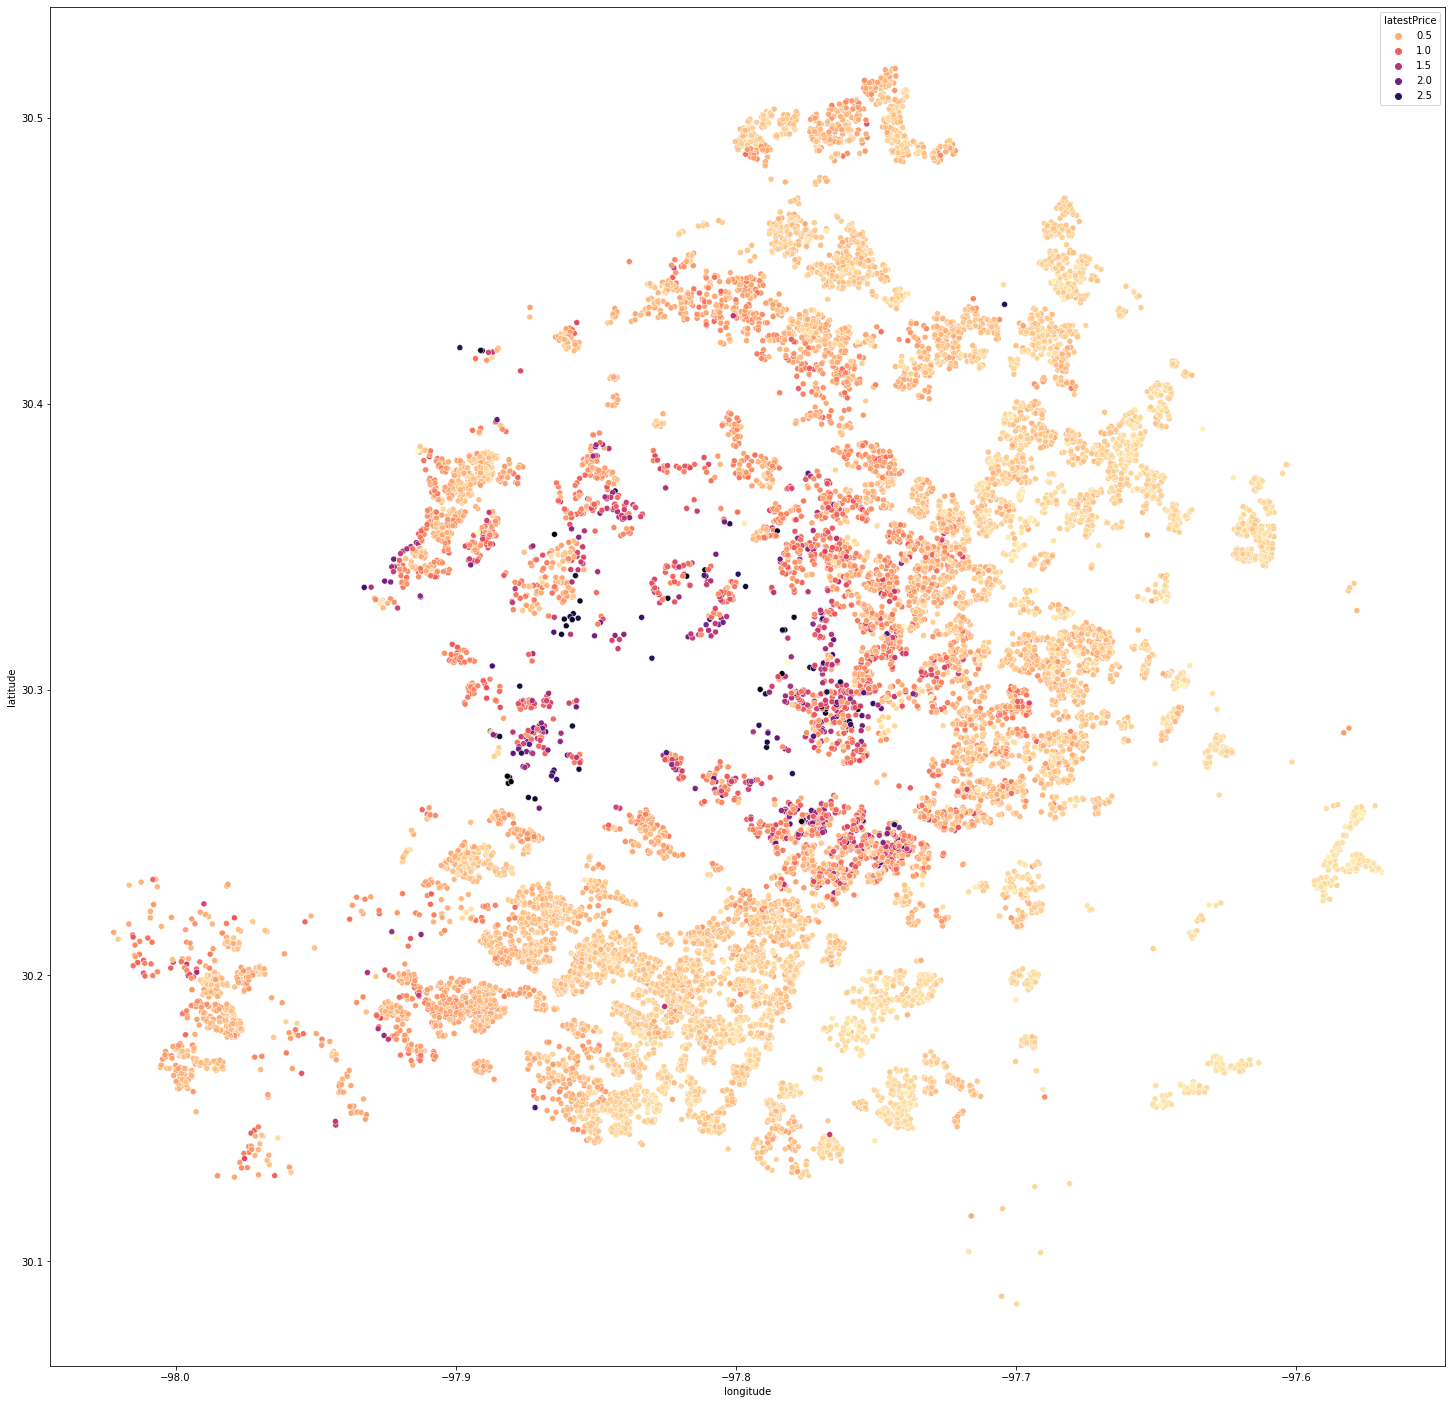

In [27]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=data, x="longitude", y="latitude", hue="latestPrice", palette="magma_r");

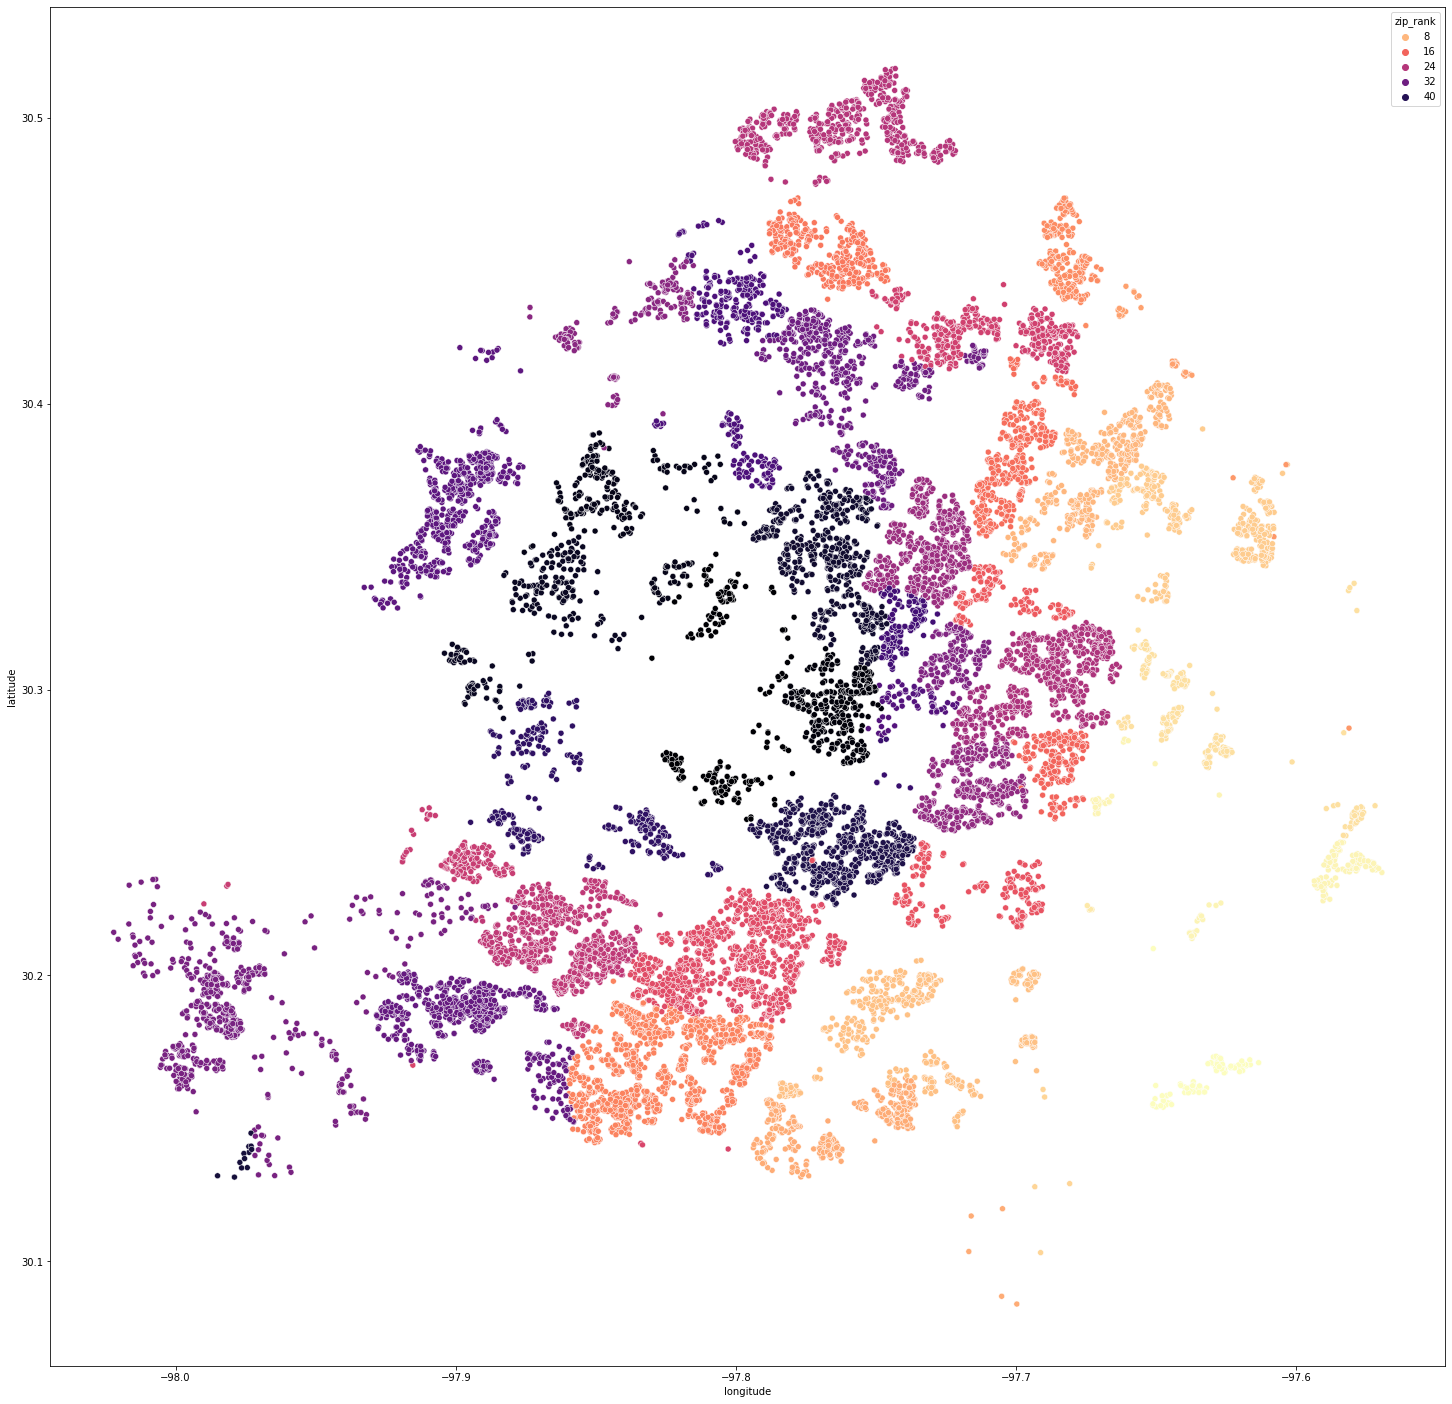

In [28]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=data, x="longitude", y="latitude", hue="zip_rank", palette="magma_r");

# Feature Engineering.

In [29]:
# we're going to convert some of our ordinal features to binary 0/1
convert_to_bool = ['numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures', 'numOfWaterfrontFeatures', 'numOfWindowFeatures', 'numOfCommunityFeatures']

df_convert_to_bool = data[convert_to_bool]
df_convert_to_bool.describe()

numOfAccessibilityFeatures  numOfAppliances  numOfParkingFeatures  \
count                15049.000000     15049.000000          15049.000000   
mean                     0.013024         3.480431              1.710479   
std                      0.179980         1.887740              0.786801   
min                      0.000000         0.000000              0.000000   
25%                      0.000000         2.000000              1.000000   
50%                      0.000000         3.000000              2.000000   
75%                      0.000000         4.000000              2.000000   
max                      8.000000        12.000000              6.000000   

       numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
count                15049.000000           15049.000000   
mean                     0.662901               0.467473   
std                      0.982330               0.824931   
min                      0.000000               0.000000   
25%                      0.000000               0.000000   
50%                      0.000000               0.000000   
75%                      1.000000               1.000000   
max                      8.000000               6.000000   

       numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  
count             15049.000000         15049.000000            15049.000000  
mean                  0.001861             0.208851                0.018938  
std                   0.047497             0.488748                0.207451  
min                   0.000000             0.000000                0.000000  
25%                   0.000000             0.000000                0.000000  
50%                   0.000000             0.000000                0.000000  
75%                   0.000000             0.000000                0.000000  
max                   2.000000             4.000000                8.000000

In [71]:
data.columns

Index(['zpid', 'zipcode', 'latitude', 'longitude', 'propertyTaxRate',
       'garageSpaces', 'hasAssociation', 'hasCooling', 'hasGarage',
       'hasHeating', 'hasSpa', 'hasView', 'homeType', 'parkingSpaces',
       'yearBuilt', 'latestPrice', 'numPriceChanges', 'latest_salemonth',
       'latest_saleyear', 'numOfAccessibilityFeatures', 'numOfAppliances',
       'numOfParkingFeatures', 'numOfPatioAndPorchFeatures',
       'numOfSecurityFeatures', 'numOfWaterfrontFeatures',
       'numOfWindowFeatures', 'numOfCommunityFeatures', 'lotSizeSqFt',
       'livingAreaSqFt', 'numOfPrimarySchools', 'numOfElementarySchools',
       'numOfMiddleSchools', 'numOfHighSchools', 'avgSchoolDistance',
       'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'zip_rank',
       'median_zip'],
      dtype='object')

In [31]:
del data["description"]
del data["homeImage"]
del data["numOfPhotos"]


In [49]:

#city, streetAddress, homeType, latest_saledate, latestPriceSource
del data["city"]
del data["streetAddress"]
del data["latestPriceSource"]
del data["latest_saledate"]


In [72]:
categories = ['zipcode', 'yearBuilt','homeType', 'hasAssociation', 'hasCooling', 'hasHeating', 'hasSpa', 'hasView','latest_salemonth', 'garageSpaces', 'propertyTaxRate', ]
for item in categories:
    data[item] = data[item].astype('category')

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.homeType= le.fit_transform(data.homeType.values)

In [73]:
check = data.copy()
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
check['homeType'] = lbl.fit_transform(check['homeType'].astype(str))

In [89]:
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
randomstate = 45

y = pd.DataFrame(data['latestPrice'])
x = data.drop('latestPrice', axis=1,)

# creating our train/validation sets and our test sets
train_labels, test_labels, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=randomstate)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
kf = KFold(n_splits=12, random_state=42, shuffle=True)
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [45]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [91]:
lgb_model_full_data = lightgbm.fit(train_labels, y_train)

In [90]:
svr_model_full_data = svr.fit(train_labels, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
print('Ridge')
ridge_model_full_data = ridge.fit(train_labels, y_train)

Ridge


In [94]:
print('RandomForest')
rf_model_full_data = rf.fit(train_labels, y_train)
print('GradientBoosting')
gbr_model_full_data = gbr.fit(train_labels, y_train)

RandomForest


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


GradientBoosting


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
    return ((0.1 * ridge_model_full_data.predict(X)) + \
            (0.2 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)))

In [100]:
# Get final precitions from the blended model
def testAndGetRMSEscore(model):
  test_predictions = model.predict(test_labels)
  rmse = round(np.sqrt(mean_squared_error(y_test, test_predictions)), 2)
  print("RMSE",rmse)


In [102]:
testAndGetRMSEscore(svr_model_full_data)
testAndGetRMSEscore(gbr_model_full_data)
testAndGetRMSEscore(lgb_model_full_data)
testAndGetRMSEscore(rf_model_full_data)

RMSE 334855.16
RMSE 32364.07
RMSE 25309.37
RMSE 1304.15


In [38]:
corr_df[corr_df["feature_a"] == "latestPrice"]

feature_a                   feature_b  correlation
16   latestPrice              numOfBathrooms     0.519304
18   latestPrice              livingAreaSqFt     0.473634
22   latestPrice             avgSchoolRating     0.445722
31   latestPrice               numOfBedrooms     0.351675
38   latestPrice    MedianStudentsPerTeacher     0.328932
64   latestPrice            numOfHighSchools     0.253791
68   latestPrice                numOfStories     0.244513
81   latestPrice                 numOfPhotos     0.201340
94   latestPrice         numOfPrimarySchools     0.180171
121  latestPrice      numOfElementarySchools     0.148878
124  latestPrice  numOfPatioAndPorchFeatures     0.142712
128  latestPrice          numOfMiddleSchools     0.134984
135  latestPrice        numOfParkingFeatures     0.125997
142  latestPrice               avgSchoolSize     0.119294
163  latestPrice         numOfWindowFeatures     0.103071
169  latestPrice       numOfSecurityFeatures     0.098958
173  latestPrice             latest_saleyear     0.097604
190  latestPrice     numOfWaterfrontFeatures     0.088187
214  latestPrice           avgSchoolDistance     0.071478
239  latestPrice             numOfAppliances     0.057542
258  latestPrice            latest_salemonth     0.052820
362  latestPrice  numOfAccessibilityFeatures     0.025591
389  latestPrice                 lotSizeSqFt     0.020054
461  latestPrice             numPriceChanges     0.010026
465  latestPrice      numOfCommunityFeatures     0.009770
597  latestPrice                        zpid          NaN
598  latestPrice                     zipcode          NaN
599  latestPrice                    latitude          NaN
600  latestPrice                   longitude          NaN
601  latestPrice             propertyTaxRate          NaN
602  latestPrice                garageSpaces          NaN
603  latestPrice               parkingSpaces          NaN
604  latestPrice                   yearBuilt          NaN
605  latestPrice                 latestPrice          NaN